In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np

Download the dataset here:

https://data.world/makeovermonday/2022w52/settings

In [2]:
df = pd.read_excel('./data/Average holiday Spending by Americans.xlsx',                 )
df

,Year,Gifts for Family,Gifts for Friends,Gifts for Coworkers,Other Gifts
0,2004,405,71,22,41
1,2005,419,79,21,44
2,2006,428,81,21,42
3,2007,434,83,21,35
4,2008,389,79,22,36
5,2009,387,67,19,35
6,2010,411,75,19,36
7,2011,424,72,22,25
8,2012,423,75,24,28
9,2013,432,75,25,27


In [3]:
df['Total spending'] = df['Gifts for Family'] + df['Gifts for Friends'] + df['Gifts for Coworkers'] + df['Other Gifts']

## How much is spent in total?

In [4]:
sns.set_style('whitegrid')

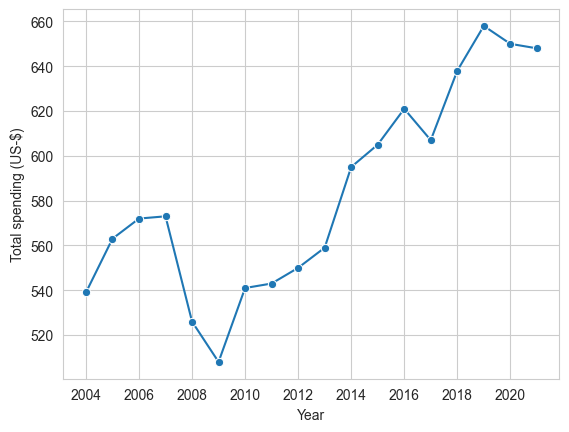

In [5]:
fig, ax = plt.subplots()
sns.lineplot(data=df, x='Year', y='Total spending', marker='o')

ax.set_xticks(df['Year'].values[::2])
ax.set_ylabel('Total spending (US-$)')

plt.savefig('./plots/2023-12-22_christmas_total.png', dpi=150, bbox_inches='tight')
plt.show()

## For whom?

In [6]:
tmp = df.melt(id_vars='Year', value_vars=['Gifts for Family', 'Gifts for Friends', 'Gifts for Coworkers', 'Other Gifts'])
tmp.head()

,Year,variable,value
0,2004,Gifts for Family,405
1,2005,Gifts for Family,419
2,2006,Gifts for Family,428
3,2007,Gifts for Family,434
4,2008,Gifts for Family,389


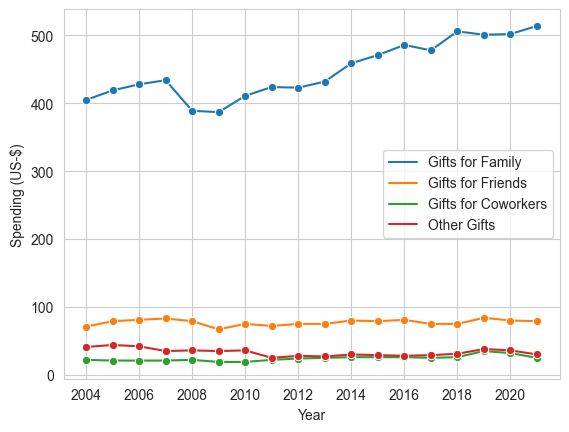

In [7]:
fig, ax = plt.subplots()
sns.lineplot(data=tmp, x='Year', y='value', hue='variable', marker='o')

ax.set_xticks(df['Year'].values[::2])
ax.set_ylabel('Spending (US-$)')
ax.legend()

plt.savefig('./plots/2023-12-22_christmas_cats.png', dpi=150, bbox_inches='tight')

plt.show()

## Normalized to 2004

In [8]:
df['Normalized'] = df['Total spending'] / df['Total spending'].values[0]

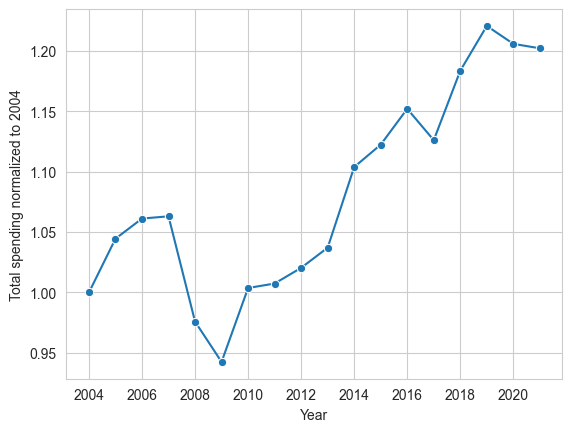

In [9]:
fig, ax = plt.subplots()
sns.lineplot(data=df, x='Year', y='Normalized', marker='o')

ax.set_xticks(df['Year'].values[::2])
ax.set_ylabel('Total spending normalized to 2004')
plt.savefig('./plots/2023-12-22_christmas_norm.png', dpi=150, bbox_inches='tight')
plt.show()